In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from env import host, user, password

# hint:  your can feed more than one value into a cdf or pdf
# use a list format [low_val, high_val]
# ex some_distribution.cdf([4,7])

def get_db_url(username, hostname, password, database):
    url = f'mysql+pymysql://{username}:{password}@{hostname}/{database}'
    return url

1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. 

    - Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.
    - What is the probability that no cars drive up in the noon hour?
    - What is the probability that 3 or more cars come through the drive through?
    - How likely is it that the drive through gets at least 1 car?

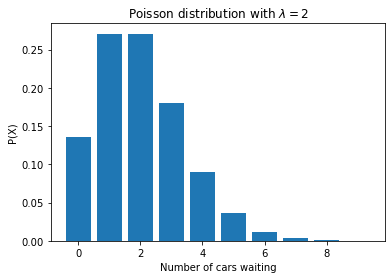

THEORETICAL PROBABILITIES
The probability of no cars in the noon hour is: 0.1353352832366127
The probability of 3 or more cars in the noon hour is: 0.32332358381693654
The probability of at least one car is:  0.8646647167633873


In [2]:
λ = 2
wait_dist = stats.poisson(λ)

x = np.arange(0,10)
y = wait_dist.pmf(x)

plt.bar(x,y)
plt.xlabel('Number of cars waiting')
plt.ylabel("P(X)")
plt.title("Poisson distribution with $λ = 2$")
plt.show()

print('THEORETICAL PROBABILITIES')
print('The probability of no cars in the noon hour is:', wait_dist.pmf(0))
print('The probability of 3 or more cars in the noon hour is:', wait_dist.sf(2))
print('The probability of at least one car is: ', wait_dist.sf(0))

2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

    - What grade point average is required to be in the top 5% of the graduating class?
    - What GPA constitutes the bottom 15% of the class?
    - An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class.   Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
    - If I have a GPA of 3.5, what percentile am I in?

In [3]:
μ = 3
σ = .3

grad_rate = stats.norm(μ,σ)


print('A GPA of ', grad_rate.isf(.05), 'is required to be in the top 5% of the class')
print('A GPA of ', grad_rate.ppf(.15), 'constitues the bottom 15% of the class')

low = grad_rate.ppf(.20)
high = grad_rate.isf(.70)

print('The range of the third decile is ', round(low,2), '-', round(high,2))
print('A student with a 2.8 GPA would qualify for the scholorship')

print('If you have a 3.5 GPA you are in the ', round(grad_rate.cdf(3.5)*100,2), 'percentile')

A GPA of  3.4934560880854417 is required to be in the top 5% of the class
A GPA of  2.689069983151863 constitues the bottom 15% of the class
The range of the third decile is  2.75 - 2.84
A student with a 2.8 GPA would qualify for the scholorship
If you have a 3.5 GPA you are in the  95.22 percentile


3. A marketing website has an average click-through rate of 2%. 
One day they observe 4326 visitors and 97 click-throughs. 
How likely is it that this many people or more click through?

In [4]:
prob = .02
trials = 4326

ct_rate = stats.binom(trials, prob)
print('The liklihood of 97 or more people clicking-through is %', round(ct_rate.sf(96) * 100,2))

The liklihood of 97 or more people clicking-through is % 13.98


4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.  What is the probability that at least one of your first 60 answers is correct?

In [5]:
trials = 60
prob = 1/100

guess_rate = stats.binom(trials, prob)
print('The probability of guetting at least one correct is: ', guess_rate.sf(0))

The probability of guetting at least one correct is:  0.45284335760923855


5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [6]:
prob = .03
trials = round(.9 * 3 * 22)

clean_rate = stats.binom(trials,prob)
print('The liklihood of being cleaned each day is: ',round(clean_rate.sf(0), 2))

two_day_clean_rate = stats.binom(trials * 2, prob)
print('The liklihood of not being cleaned in two days is: ',round(two_day_clean_rate.cdf(0), 2))

five_day_clean_rate = stats.binom(trials * 5, prob)
print('The liklihood of not being cleaned all week is: ',five_day_clean_rate.cdf(0))

  

The liklihood of being cleaned each day is:  0.83
The liklihood of not being cleaned in two days is:  0.03
The liklihood of not being cleaned all week is:  0.00012521651388091353


6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 
    - If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [7]:
μ = 15
σ = 3
# have 33 minutes to wait(one hour minus the 15 minutes to eat, 2 minutes to order, and 10 minutes wait after 
# you order) you can wait for 16 people, but not 17 (must be 16 or less)

line_rate = stats.norm(μ,σ)
print('The liklihood that you have time to eat is: ', round(line_rate.cdf(16),4))

The liklihood that you have time to eat is:  0.6306


7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

    - What percent of employees earn less than 60,000?
    - What percent of employees earn more than 95,000?
    - What percent of employees earn between 65,000 and 80,000?
    - What do the top 5% of employees make?
    
Hint If you're looking at this exercise and wondering "How do I get pandas to talk the database, again?", remember that you'll need 3 things: your .gitignore, your env.py, and to use pd.read_sql. Copy over your .gitignore and env.py from your data science libraries exercises folder, and connect to the employees database like so:

In [8]:
url = get_db_url(user, host, password, 'employees')

μ_df = pd.read_sql('select avg(salary) as u from salaries where to_date > NOW()', url)
σ_df = pd.read_sql('select stddev(salary) as o from salaries where to_date>NOW()', url)
μ = μ_df['u'][0]
σ = σ_df['o'][0]

In [9]:
sal_rate = stats.norm(μ,σ)
print('%',round(sal_rate.cdf(59_999.99) * 100,4), 'of current employees make less than $60K')
print('%',round(sal_rate.sf(95_000) * 100,4), 'of current employees make more than $95K')

#less than 65
low_end = sal_rate.cdf(64_999.99)
#more than 80
high_end = sal_rate.sf(80_000)
# middle = everyone minus those two percentages
middle = 1 - low_end - high_end
print('%', round(middle * 100,4), 'of employees make between $65K and $80K')
print('The top 5% of employees make: $', round(sal_rate.isf(.05),2))

% 24.3857 of current employees make less than $60K
% 9.2088 of current employees make more than $95K
% 33.5061 of employees make between $65K and $80K
The top 5% of employees make: $ 100484.59
